# Measuring Performance in Linear Regression Models
This notebook covers the basic measurement methods for linear regression moodels

**Measures of Error**
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)

**Measure of Explained Variance**
- R² (Coefficient of Determination)
- Adjusted R²

**Model Selection Criteria**
- Akaike Information Criterion (AIC)
- Bayesian Information Criterion (BIC)



## Explination of SSE and SST (Sum of Squared Errors) and (Total Sum of Squares)

### Sum of Squared Errors (SSE)
**Definition:**
* SSE measures the total deviation of the response values from the fitted values. It is a measure of the discrepancy between the data and an estimation model.

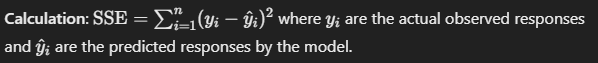

### Total Sum of Squared (SST)
**Definition:**
* SST measures the total variance in the observed data and is used as a baseline to compare how well a model fits the data.

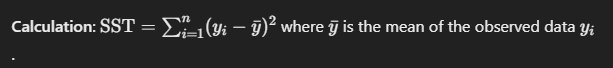

#### Relationship and Usage
* SST tells you how much the data points, vary around their mean.
* SSE tells you how much the data points vary around the estimated regression line.
* The difference between SST and SSE gives you the Sum of Squares of Regression (SSR), which measures how much of the variance in the dependent variable your model explained.

#### Relationship with other Measurements
- **MSE**: MSE is the average of the SSE. It is calculated by dividing the SSE by the number of observations n.
- **RMSE**: RMSE is the square root of MSE and provides an estimate of the standard deviation of the unexplained variance.
- **Coefficient of Determination (R squared)**: Measures the proportion of variance in the dependent variable that is predictable from the independent variables
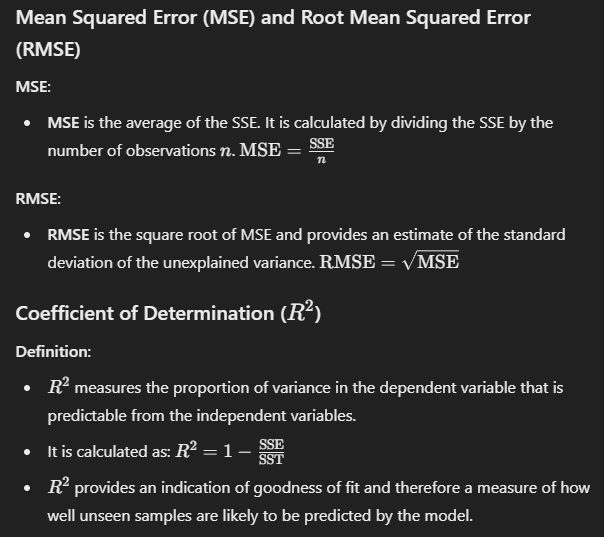

### Interpretations
- A lower SSE indicates a model with greater accuracy.
- A higher R squared value (close to 1) indicates that a large proportion of the variance in the dependent variable has been explained by the independent variables in the model.
- R squared and RMSE are often used together to diagnose the variation in the unexplained data. R squared as a relative measure of fit and RMSE as an absolute measure of fit.

In [1]:
# Example
import numpy as np

y = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 1.9, 3.1, 3.9, 4.8])
y_mean = np.mean(y)

# Calculating SSE
sse = np.sum((y - y_pred) ** 2)

# Calculating SST
sst = np.sum((y - y_mean) ** 2)

# Calculating R^2
r_squared = 1 - (sse / sst)

print("SSE:", sse)
print("SST:", sst)
print("R^2:", r_squared)

SSE: 0.08000000000000014
SST: 10.0
R^2: 0.992


In [2]:
# Example prediction based on the linear regression
from sklearn.linear_model import LinearRegression
import numpy as np

# Independent variable (house sizes in square feet)
X = np.array([[1500], [1800], [2400], [3000], [3500]])

# Dependent variable (house prices in thousands of dollars)
y = np.array([400, 450, 580, 610, 680])

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Making predictions
y_pred = model.predict(X)

# Compute SST and SSE
sst = np.sum((y - np.mean(y)) ** 2)
sse = np.sum((y - y_pred) ** 2)

# Compute R^2
r_squared = model.score(X, y)

print("SSE:", sse)
print("SST:", sst)
print("R^2:", r_squared)

SSE: 2191.8008784773056
SST: 53720.0
R^2: 0.9591995368861261


## Measures of Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)

### Mean Squared Error (MSE)
**Theoretical Explanation:** 
- MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual values. It is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.
- MSE is a robust measure of accuracy that punishes larger errors more significantly, making it useful when big mistakes are particularly undesirable.

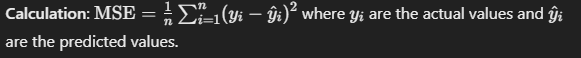


**Benefits:**
- **Sensitivity to Large Errors**: MSE is particularly useful when large errors are more significant than smaller ones because it squares the errors before averaging them. This squaring gives more weight to larger errors, which might be crucial in many business or safety-critical applications where large errors have more severe consequences.

**Drawbacks:**
- **Overly Penalizes Large Errors**: While the sensitivity to larger errors can be a benefit, it can also be a drawback. MSE may over-penalize models that are generally accurate but have a few large errors. This characteristic can lead to misleading interpretations in cases where occasional large errors are acceptable.
- **Influence by Outliers**: Due to the squaring of each error term, outliers can disproportionately affect MSE. A single large error can dominate the mean, leading to an MSE value that does not representatively reflect the performance of the model for the majority of the data.


In [3]:
# Code Example for Mean Squared Error
import numpy as np
# Actual and predicted values
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mse = np.mean((np.array(y_true) - np.array(y_pred))**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.375


### Root Mean Squared Error (RMSE)
**Theoretical Explanation:** 
- RMSE is the square root of the mean of the square of all of the error. It is a measure that is used to quantify the difference between values predicted by a model and the values observed.
- RMSE is the square root of the average of the square of all of the errors. It provides an estimate of the magnitude of the error. By taking the square root of MSE, RMSE lowers the sensitivity to outliers compared to MSE and is on the same scale as the data, making interpretation straightforward.

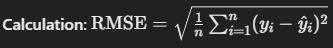

**Benefits:**
- **Error Scale**: RMSE is in the same units as the response variable, making it more interpretable than MSE. It indicates the typical size of the prediction error and provides a clear idea of how much error to expect on average.

**Drawbacks:**
- **Similar to MSE**: RMSE inherits most drawbacks of MSE, including being sensitive to outliers. It might also give a distorted impression when the error distribution is skewed.

In [4]:
# Code Example for Mean Squared Error
# Creating dataset
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Calculating Mean Squared Error
mse = np.mean((y_true - y_pred) ** 2)

# Calculating Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.6123724356957945


### Mean Absolute Error (MAE)
**Theoretical Explanation:** 
- MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

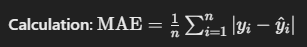

**Benefits:**
- **Robustness to Outliers**: MAE is less sensitive to outliers than MSE or RMSE. By taking the absolute value of each error, it treats all deviations from the true values equally, no matter their direction. This characteristic makes it useful for datasets with anomalies or outliers.

**Drawbacks:**
- **Equal Weighting of All Errors**: While being less sensitive to outliers is an advantage, the equal weighting of all errors can be a drawback. MAE does not differentiate between types of errors and can undervalue the impact of consistently small errors which might be significant in cumulative terms.

In [5]:
import numpy as np

# Creating dataset
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Calculating Mean Absolute Error
mae = np.mean(np.abs(y_true - y_pred))
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.5


### Mean Absolute Percentage Error
**Theoretical Explanation:**
- MAPE measures the size of the error in percentage terms. It is calculated as the average of the unsigned percentage error.
- It is intuitive for understanding the relative magnitude of the prediction errors.

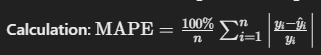

**Benefits:**
- **Interpretability**: MAPE expresses errors as a percentage, making it particularly intuitive and easy to communicate. It tells you what percentage of the actual values the errors represent, facilitating comparisons across different data scales or units.

**Drawbacks:**
- **Issues with Zero or Near Zero Actuals**: MAPE can become undefined or disproportionately high if any actual values are zero or near zero, making it unreliable or misleading in datasets where zero or low values are common.
- **Variable Impact Based on Actual Values**: The impact of the error in MAPE depends on the magnitude of the actual value, giving smaller values a disproportionately large influence on the overall error metric.


In [6]:
import numpy as np

# Creating dataset
y_true = np.array([3, -0.5, 2, 7])  # Note: Avoid zero in actual values when using MAPE
y_pred = np.array([2.5, 0.0, 2, 8])

# Calculating Mean Absolute Percentage Error
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 32.73809523809524


### Summary Table: Benefits and Drawbacks
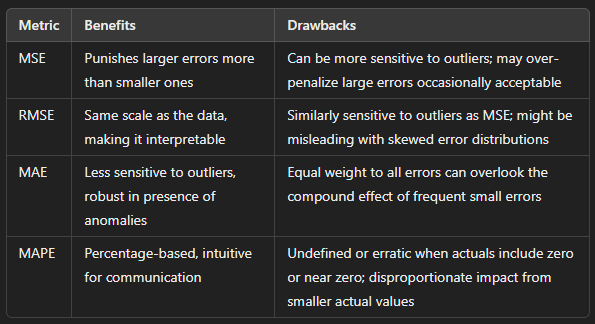

## Why SSE is always smaller than SST

### R-Squared Equation Explanation
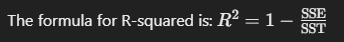

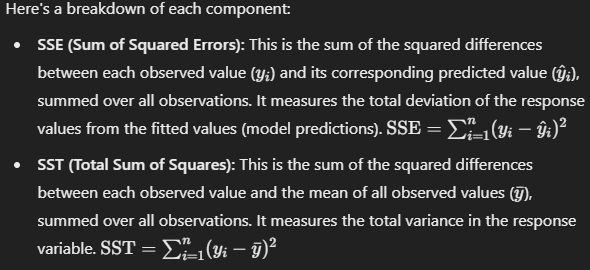

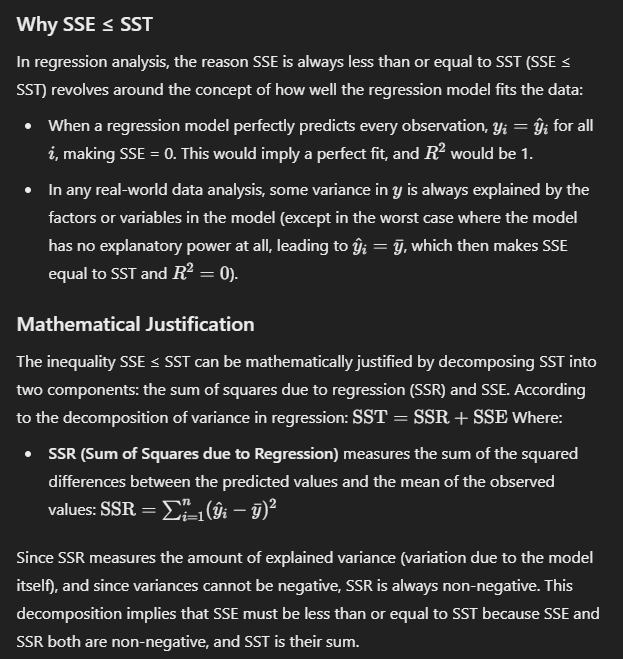

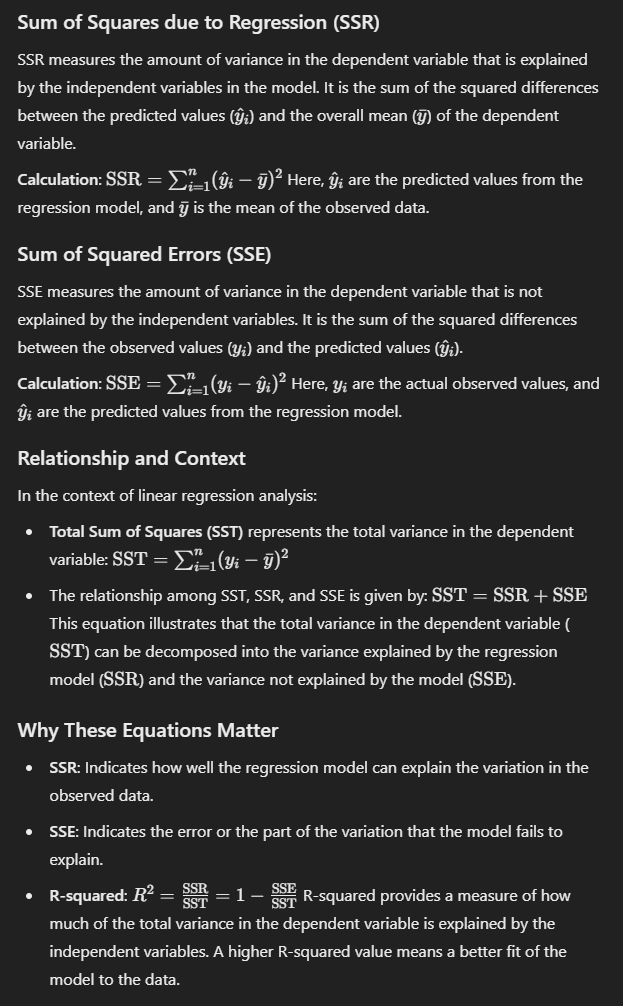

### Practical Implications
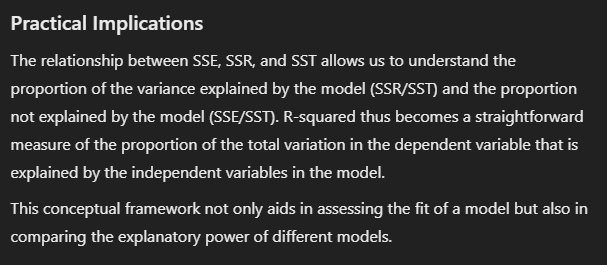



## Measure of Explained Variance
- R² (Coefficient of Determination)
- Adjusted R²


### Coefficient of Determination (R-squared)

**Theoretical Explanation:**
- R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It indicates how well data fit a statistical model – more specifically, a line. R-squared values range from 0 to 1 and are often expressed as percentages. A higher R-squared percentage reflects a model that explains a higher proportion of the variance.

**Benefits:**
- **Easy to Understand:** R-squared is one of the most intuitive metrics in regression analysis. It is expressed as a proportion (ranging from 0 to 1), where higher values indicate that more variance is captured by the model. This makes it very straightforward to communicate how well the model fits the data.
- **Direct Interpretation:** R-squared directly measures the percentage of the response variable's variance that is explained by a linear model. This provides a clear and direct way to assess and compare the effectiveness of models.

**Drawbacks:**
- **Sensitivity to Number of Predictors:** R-squared automatically and invariably increases when additional predictors are included in the model, regardless of whether those predictors are relevant. This can lead to overfitting, where the model is too closely fit to a limited set of data points and may not perform well on unseen data.
- **Potentially Misleading:** Because R-squared always increases with more predictors, it can give a false sense of accuracy in models with many variables. It can be overly optimistic about the fit of the model, especially if there is a lot of noise in the data or if irrelevant predictors are included.

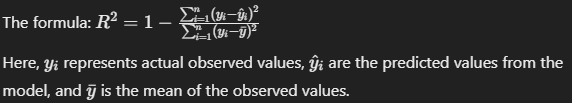

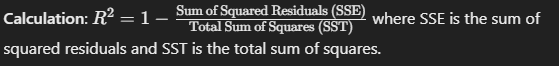

In [7]:
# Code example of R squared
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generating random data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X.squeeze() + np.random.randn(100)  # True relationship

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.42


### Adjusted R-squared
**Theoretical Explanation:**
- Adjusted R-squared also indicates how well terms fit a curve or line but adjusts for the number of terms in a model. Unlike R-squared, adjusted R-squared increases only if a new term improves the model more than would be expected by chance. It accounts for the number of predictors in the model and can help to prevent overfitting by penalizing excessive use of non-contributing predictors.


**Benefits:**
- **Adjusts for Model Complexity:** Unlike R-squared, Adjusted R-squared takes into account the number of predictors used in the model relative to the number of data points. It introduces a penalty for adding predictors that do not improve the model, which helps to prevent overfitting.
- **More Robust Against Overfitting:** By penalizing the addition of extraneous predictors, Adjusted R-squared provides a more honest measure of model performance. It can be particularly useful in feature selection and for validating the necessity of each variable included in the model.

Drawbacks:
- **More Complex to Calculate:** While still computable using standard statistical software and functions, Adjusted R-squared is not as straightforward as R-squared because it involves adjusting the statistic based on the number of samples and the number of predictors. This complexity can sometimes obscure its interpretation, especially for those new to statistical analysis.
- **May Underestimate the Fit:** Because it is more conservative and includes a penalty term, Adjusted R-squared can sometimes underestimate the performance of larger, more complex models, particularly when those models are appropriate for the complexity of the data and the underlying phenomena being modeled.

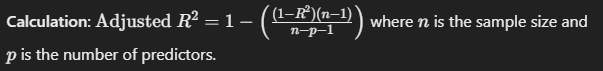

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generating random data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X.squeeze() + np.random.randn(100)  # True relationship

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Number of observations and number of predictors
n = X.shape[0]
p = X.shape[1]

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2:.2f}")

Adjusted R-squared: 0.41


### R squared and Adjusted R sqaured Interpretation
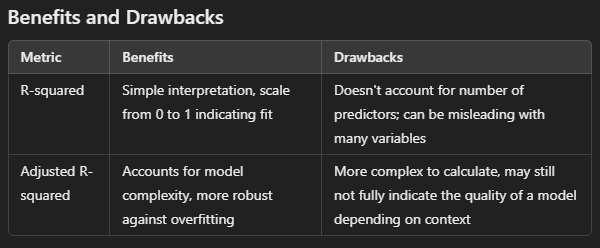

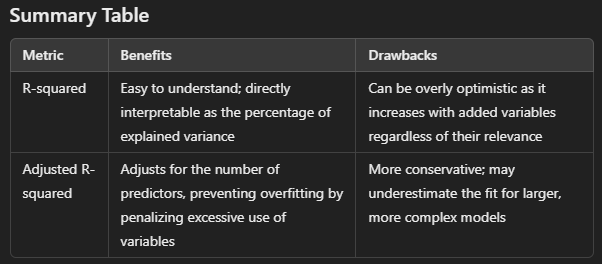

## Model Selection Criteria
- Akaike Information Criterion (AIC)
- Bayesian Information Criterion (BIC)

### Akaike Information Criterion (AIC)

**Theoretical Explanation:** 
- AIC is a criterion for model selection among a finite set of models. It is founded on information theory: it offers an estimate of the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model. AIC deals with the trade-off between the goodness of fit of the model and the complexity of the model.

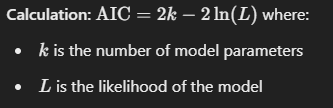

**How AIC Works**
- The term 2k penalizes the complexity of the model (more parameters mean a higher k).
- The term−2ln(L) increases as the likelihood of the model increases (better fit to the data).
- Therefore, increasing the number of parameters without sufficiently increasing the likelihood results in a higher AIC, which is less desirable.

**Goal of AIC:**
- A lower AIC suggests a model that has a better balance between its goodness of fit and the complexity of the model, indicating it loses less information.
- AIC aims to select the model that best explains the data with the fewest possible parameters. It provides a means for model selection by balancing the model fit and model complexity.

### What is Model Parameters and the Likelihood of the Model (L)
**Model Parameters (k)**
- In the context of a regression model, the number of model parameters k typically includes all the coefficients being estimated, plus an intercept. For a linear regression model:
    * Intercept (1 parameter): This is the constant term in the linear equation.
    * Slope Coefficients: Each predictor or independent variable has an associated coefficient, and each one counts as a parameter.
**Example Context:**
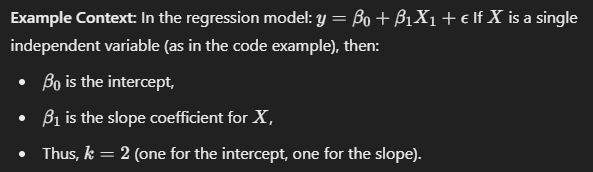

**Likelihood of the Model (L)**
- The likelihood L of the model refers to the probability of the observed data given a specific set of parameters. In the case of linear regression fitted by ordinary least squares (OLS), the likelihood is based on the assumption that the residuals (errors) are normally distributed.

**Calculating Likelihood:**
* The likelihood L can be thought of in terms of how probable the observed data are if the model's estimated parameters are the true parameters. This is often conceptualized through the model's residuals:
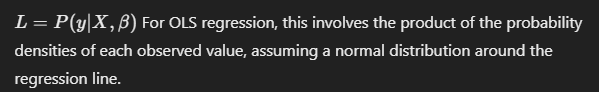
**In Practical Terms with StatsModels:**
* In Python's statsmodels, when you fit a model using OLS, the likelihood of the model, especially in the context of AIC calculation, is computed internally. You typically do not calculate it explicitly but rely on the fitting process, which optimizes this likelihood.

**Likelihood Concept in Regression**
    * Likelihood of Observing the Actual Data:
        * In the context of model fitting, particularly in regression analysis using likelihood-based methods (such as maximum likelihood estimation), the "likelihood" refers to the probability of observing the actual data given specific model parameters.
        * This likelihood is assessed under the assumption about the distribution of errors or residuals (difference between predicted and actual values). For most linear regression models, it's assumed that residuals are normally distributed.

    * Calculation Perspective:
        * The likelihood involves calculating how well the predicted values (from your model) correspond to the actual observed values, under the statistical assumptions of your model (e.g., normally distributed residuals).
        
        * Essentially, it's about assessing the probability of obtaining the observed data  given the predictors and estimated parameters. The closer the predicted values  are to the actual values, the higher the likelihood.

In [9]:
# Code Example for AIC
import numpy as np
import statsmodels.api as sm

# Generate some data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 1 + 2 * X.squeeze() + np.random.normal(size=100)

# Fit a regression model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

# Calculate AIC
aic = results.aic
print("AIC:", aic)

AIC: 287.0286983190931


In [11]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 1 + 2 * X.squeeze() + np.random.normal(size=100)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit models
# Add a constant to X and X_poly for the intercept
model1 = sm.OLS(y, sm.add_constant(X)).fit()
model2 = sm.OLS(y, sm.add_constant(X_poly)).fit()

# Compare AIC
aic1 = model1.aic
aic2 = model2.aic

print("AIC for Model 1:", aic1)
print("AIC for Model 2:", aic2)

# Determine which model is better
better_model = "Model 1" if aic1 < aic2 else "Model 2"
print("Better model based on AIC:", better_model)

AIC for Model 1: 287.0286983190931
AIC for Model 2: 287.1078852746057
Better model based on AIC: Model 1


### Bayesian Information Criterion (BIC)
***Theoretical Explanation:**
- BIC is similar to AIC but with a stronger penalty for including additional variables in the model. It is also based on information theory, but it adds a penalty term for the number of parameters in the model. This makes BIC more stringent about including unnecessary variables, thus it tends to penalize complex models more than AIC.

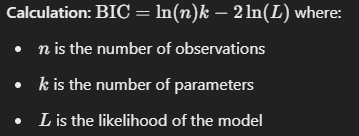

**Why BIC penalize complex models more than AIC**
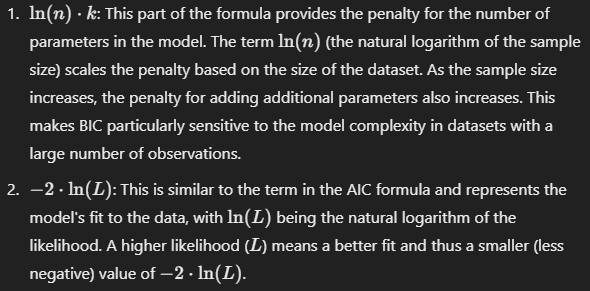

- BIC’s more substantial penalty for the number of parameters can be attributed to its multiplication by ln(n), where n is the number of data points. This multiplication means that the penalty increases not only with more parameters but also with a larger dataset. In contrast, AIC only multiplies the number of parameters by 2, regardless of the sample size.

**Practical Implications**
* **Model Parsimony**: BIC is particularly useful when model parsimony is essential. It discourages overfitting more effectively than AIC by heavily penalizing the inclusion of unnecessary parameters as the sample size grows. This makes it ideal for scenarios where you suspect that a simpler model might suffice.
* **Comparative Use**: In practice, BIC is often used alongside AIC to provide a comprehensive view of model performance from different perspectives. While AIC is more forgiving with the number of parameters and can be used to ensure all relevant variables are considered, BIC helps to ensure that the model does not become overly complex, particularly in large datasets.

In [12]:
# Code example for computing and comparing AIC and BIC
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 1 + 2 * X.squeeze() + np.random.normal(size=100)

# Create polynomial features for the second model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Add a constant to X and X_poly for the intercept term in the regression
X_const = sm.add_constant(X)
X_poly_const = sm.add_constant(X_poly)

# Fit linear regression models
model1 = sm.OLS(y, X_const).fit()
model2 = sm.OLS(y, X_poly_const).fit()

# Calculate and print AIC and BIC for each model
aic1 = model1.aic
bic1 = model1.bic
aic2 = model2.aic
bic2 = model2.bic

print("Model 1 AIC:", aic1)
print("Model 1 BIC:", bic1)
print("Model 2 AIC:", aic2)
print("Model 2 BIC:", bic2)

# Determine which model is better based on AIC and BIC
better_model_aic = "Model 1" if aic1 < aic2 else "Model 2"
better_model_bic = "Model 1" if bic1 < bic2 else "Model 2"

print("Better model based on AIC:", better_model_aic)
print("Better model based on BIC:", better_model_bic)


Model 1 AIC: 287.0286983190931
Model 1 BIC: 292.2390386910693
Model 2 AIC: 287.1078852746057
Model 2 BIC: 294.92339583256995
Better model based on AIC: Model 1
Better model based on BIC: Model 1
